## 1 Exercise: Generate random data
### The idea is to learn how to generate random data following a gaussian distribution with different variances. Moreover we will generate a specific outlier in order to study how it affects a linear regression assuming different metrics.

[2.80370887 2.66426076 2.25786905 2.70487437 2.1986318  2.19444397
 2.71047474 2.09827473 2.08813082 2.38323714 2.00915404 2.34980022
 2.91724106 2.60296242 2.00702792 2.74164729 2.99735526 2.77543144
 2.66173126 5.        ]


(array([4., 2., 1., 2., 0., 1., 3., 4., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([2.00702792, 2.10679366, 2.20655939, 2.30632513, 2.40609087,
        2.5058566 , 2.60562234, 2.70538807, 2.80515381, 2.90491955,
        3.00468528, 3.10445102, 3.20421675, 3.30398249, 3.40374823,
        3.50351396, 3.6032797 , 3.70304543, 3.80281117, 3.9025769 ,
        4.00234264, 4.10210838, 4.20187411, 4.30163985, 4.40140558,
        4.50117132, 4.60093706, 4.70070279, 4.80046853, 4.90023426,
        5.        ]),
 <BarContainer object of 30 artists>)

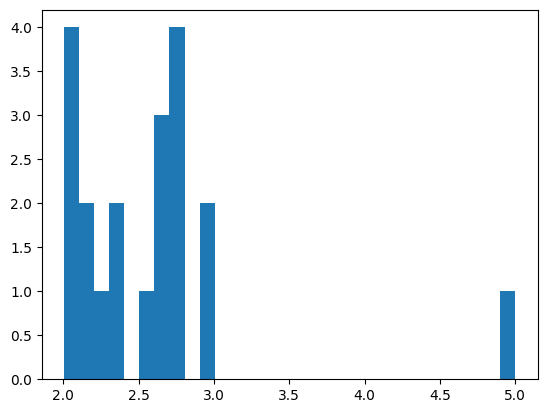

In [1]:
# 1) Generate an array array (with length=20) of standard deviations of random values following a uniform distribution 
# between 2 and 3. Fix the value of the last element = 5. The last point will be the outlier.

import numpy as np
import matplotlib.pyplot as plt


std_array = np.random.uniform(2, 3, 20)
std_array[-1] = 5
print(std_array)

plt.hist(std_array, bins=30)

In [2]:
#2) Generate an array, std-array, of 20 values following a gaussian distribution with a standard deviation defined 
# by the array generated in the previous 1). Replace the last point by a value correponding to +2.5 \sigma (you have the outlier generation).

sta_gaussian_array = np.random.normal(0, std_array)
sta_gaussian_array[-1] = 2.5 * std_array[-1]

print(sta_gaussian_array)

[ 0.28906371 -3.00502741  3.45282163 -1.51715478  1.88530933  0.6526677
  5.17181341 -1.37833215 -4.97535858  1.572958   -1.47469049  5.2811699
 -1.29438808  6.57826492 -1.1344601   4.79940073  1.66143411  2.24826031
 -2.01476975 12.5       ]


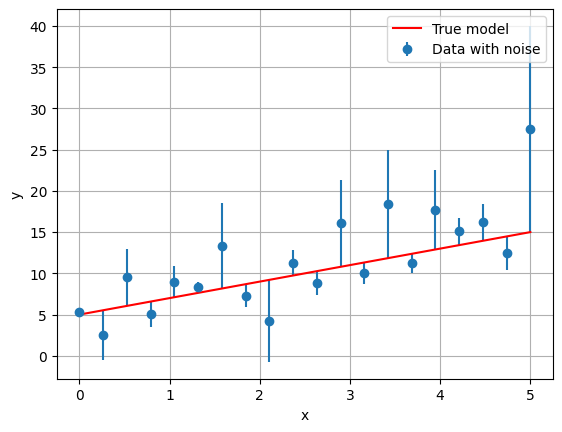

In [3]:
# 3) Generate an array of 20 values linearly spaced between 0 and 5 (your x-array)
x_array = np.linspace(0, 5, 20)


# 4) Generate the y-array to follow the relation y= a + bx + noise, wherre a=2, b=5 and 
#  noise corresponds to the  fluctuations you have generated in 2). 


def model(x, a, b):
    return a*x + b

true_model = model(x_array, 2, 5)
y_array = true_model + sta_gaussian_array


# 5) plot the data points

plt.errorbar(x_array, y_array, yerr=np.abs(sta_gaussian_array), fmt='o', label='Data with noise')
plt.plot(x_array, true_model, 'r-', label='True model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


### 1.2 Use gradient descent for finding best values of a and b

In [6]:
# 6) Create a function, L1-dist, that take in argument (params, x-array, y-array), where params will correspond
#to an array of 2 elements [a,b]. This function have to return the sum of the absolute differences between the
#model (params[0]*x-array + params[1]) and the y-array values. This function is evaluating the L1 metric
#distance between the y-array data points and the model for params values.


def L1_dist(params, x_array, y_array):
    a, b = params
    model_values = model(x_array, a, b)
    return np.sum(np.abs(model_values - y_array))


#Create a function, L2-dist, that take in argument (params, x-array, y-array), where params will correspond
#to an array of 2 elements [a,b]. This function have to return the sum of the square differences between the
#model (params[0]*x-array + params[1]) and the y-array values. This function is evaluating the L2 metric
#distance between the y-array data points and the model for params values.


def L2_dist(params, x_array, y_array):
    a, b = params
    model_values = model(x_array, a, b)
    return np.sum((model_values - y_array) ** 2)

# Create a function, Chi2-dist, that take in argument (params, x-array, y-array, std-array), where params will
#correspond to an array of 2 elements [a,b]. This function have to return the sum of the square differences
#between the model (params[0]*x-array + params[1]) and the y-array values, divided by the std-array at the
#square. This function is evaluating the χ2 metric distance between the y-array data points and the model  for params values.


def Chi2_dist(params, x_array, y_array, std_array):
    a, b = params
    model_values = model(x_array, a, b)
    return np.sum(((model_values - y_array) / std_array) ** 2)
